# Лабораторная работа  №2


# Задача: Распознование рукописных изображений. Класстеризация датасета MNIST, измерение меток ARI.

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score
import numpy as np
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np



Произведём k-means класстеризацию и сравним результат класстериазции с предсказанными центрами класстеров

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = MNIST(root='./data', train=True, download=True, transform=transform)
testset = MNIST(root='./data', train=False, download=True, transform=transform)

train_data = trainset.data.reshape((-1, 28 * 28))
test_data = testset.data.reshape((-1, 28 * 28))

train_data = train_data.float() / 255.0
test_data = test_data.float() / 255.0

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(train_data)

sample_indices = np.random.choice(len(test_data), size=1000, replace=False)
sample_data = test_data[sample_indices]
sample_labels = torch.tensor(kmeans.predict(sample_data))

Произведём DBCAN и Агломеративную кластеризации и подсчитаем ARI для всех методов

In [6]:
test_labels = testset.targets


In [6]:
aggclust = AgglomerativeClustering(n_clusters=10)
aggclust.fit(train_data)
aggclust_predicted_labels = torch.tensor(aggclust.fit_predict(test_data))
aggclust_ari = adjusted_rand_score(test_labels, aggclust_predicted_labels)

print("Agglomerative Clustering ARI: ", aggclust_ari)

Agglomerative Clustering ARI:  0.6063391081376247


In [9]:
dbscan = DBSCAN(eps=6.0, min_samples=6)
dbscan.fit(train_data)
dbscan_predicted_labels = torch.tensor([np.where(dbscan.labels_ == i)[0][0] if i != -1 else -1 for i in dbscan.fit_predict(test_data)])
dbscan_ari = adjusted_rand_score(test_labels, dbscan_predicted_labels)
print("DBSCAN ARI: ", dbscan_ari)

DBSCAN ARI:  0.014415031902686245


In [7]:
kmeans_predicted_labels = torch.tensor(kmeans.predict(test_data))
kmeans_ari = adjusted_rand_score(test_labels, kmeans_predicted_labels)
print("K-means ARI: ", kmeans_ari)

K-means ARI:  0.3665407552476602


Таким образом была выолнена классетризация датасета MNIST и вычеслено значение ARI. 
Иеррахческая класстеризация получила самое высокое значение ARI.
DBSCAN основанный на объединении значений высокой плотности в классетры получил очень маленькой значение ARI, так как происходит объединение значений не попавших в класстер, таким образом положение предсказанных класстеров сильно отличается от известных. 

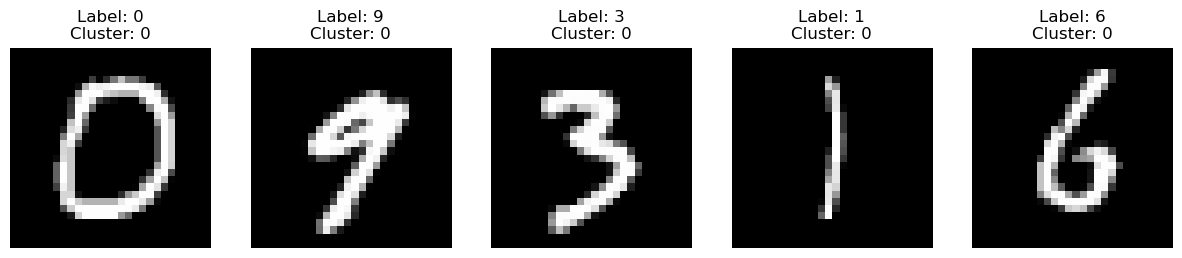

In [10]:
sample_indices = [10, 20, 30, 40, 50]
fig, axes = plt.subplots(nrows=1, ncols=len(sample_indices), figsize=(15, 5))

for i, idx in enumerate(sample_indices):
    image = testset[idx][0].numpy().squeeze()
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Label: {}\nCluster: {}'.format(testset[idx][1], dbscan.labels_[idx]))

plt.show()